## Import statements

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
import torchvision
from torchvision import transforms
import os
from datetime import datetime  # For generating timestamped folder names
from model import *
from data import *
from utils import *
from train import *
from tqdm.auto import tqdm
import os

# Check if GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Hyperparameters & Dataset loading

In [3]:
params = {
    'batch_size': 256,
    'learning_rate': 0.01,
    'save_dir': 'model_ckpts',
    'weight_decay': 1e-4,
    'grad_clip': 0.1,
}

In [4]:
#Normal case
train_data_loader = create_train_data_loader(params["batch_size"])

#num instances ranging from 1,10,100,1000
train_data_num_1_loader = create_train_data_loader_with_num_instances(1, params["batch_size"])
train_data_num_10_loader = create_train_data_loader_with_num_instances(10, params["batch_size"])
train_data_num_100_loader = create_train_data_loader_with_num_instances(100, params["batch_size"])
train_data_num_1000_loader = create_train_data_loader_with_num_instances(1000, params["batch_size"])

#Testing and validation for all cases
test_data_loader, validation_data_loader = create_test_and_validation_data_loader(params["batch_size"])


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
def get_model_weight_path(experiment, epoch_num=None):
    directory = os.path.join(params["save_dir"], experiment)
    if epoch_num == None:
        # Get a list of all files in the directory
        files = os.listdir(directory)

        # Filter out only the files (exclude directories)
        files = [f for f in files if os.path.isfile(os.path.join(directory, f))]

        # Sort the files by their modification time in descending order (most recent first)
        files.sort(key=lambda x: os.path.getmtime(os.path.join(directory, x)), reverse=True)

        # Get the name of the most recently added file
        model_file = files[0] if files else None
    else:
        model_file = f"model_epoch_{epoch_num}.pt"
    return os.path.join(directory, model_file)


# <u>Experiment 1: Full dataset</u>

### 1.1 Train the model

In [16]:
full_experiment = "full"
full_cifar_model = CIFARClassifier()
full_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [17]:
full_epoch_numbers, full_training_losses, full_training_accuracy, full_validation_losses, full_validation_accuracy = train_model(
    full_cifar_model,
    train_data_loader,
    validation_data_loader,
    50,
    params,
    full_experiment,
    epoch_saver_count=1,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/50 [00:00<?, ?it/s]

Epoch 1/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1: train_loss: 1.1363145660256486 | train_accuracy: 0.58977 | val_loss: 0.7853668133417765 | val_accuracy: 0.7306666666666667 
Going to save model @ Epoch:1
Save checkpointed the model at the path model_ckpts\full\model_epoch_1.pt


Epoch 2/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 2: train_loss: 0.6608250449837931 | train_accuracy: 0.77266 | val_loss: 0.5474538207054138 | val_accuracy: 0.8106666666666666 
Going to save model @ Epoch:2
Save checkpointed the model at the path model_ckpts\full\model_epoch_2.pt


Epoch 3/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 3: train_loss: 0.5491565869897223 | train_accuracy: 0.81349 | val_loss: 0.6952909131844839 | val_accuracy: 0.774 
Going to save model @ Epoch:3
Save checkpointed the model at the path model_ckpts\full\model_epoch_3.pt


Epoch 4/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 4: train_loss: 0.49966417363537546 | train_accuracy: 0.83025 | val_loss: 0.4815833618243535 | val_accuracy: 0.8453333333333334 
Going to save model @ Epoch:4
Save checkpointed the model at the path model_ckpts\full\model_epoch_4.pt


Epoch 5/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 5: train_loss: 0.47799106197588886 | train_accuracy: 0.83879 | val_loss: 0.5011452386776606 | val_accuracy: 0.8306666666666667 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\full\model_epoch_5.pt


Epoch 6/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 6: train_loss: 0.46809297373227754 | train_accuracy: 0.84469 | val_loss: 0.5454108317693075 | val_accuracy: 0.8153333333333334 
Going to save model @ Epoch:6
Save checkpointed the model at the path model_ckpts\full\model_epoch_6.pt


Epoch 7/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 7: train_loss: 0.46640807504544174 | train_accuracy: 0.84478 | val_loss: 0.5455832133690516 | val_accuracy: 0.82 
Going to save model @ Epoch:7
Save checkpointed the model at the path model_ckpts\full\model_epoch_7.pt


Epoch 8/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 8: train_loss: 0.4709817023990709 | train_accuracy: 0.84333 | val_loss: 0.5776409208774567 | val_accuracy: 0.8133333333333334 
Going to save model @ Epoch:8
Save checkpointed the model at the path model_ckpts\full\model_epoch_8.pt


Epoch 9/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 9: train_loss: 0.49360683773789565 | train_accuracy: 0.83901 | val_loss: 0.6512326697508494 | val_accuracy: 0.798 
Going to save model @ Epoch:9
Save checkpointed the model at the path model_ckpts\full\model_epoch_9.pt


Epoch 10/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 10: train_loss: 0.49985203291753977 | train_accuracy: 0.83831 | val_loss: 0.6109988788763682 | val_accuracy: 0.806 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\full\model_epoch_10.pt


Epoch 11/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 11: train_loss: 0.509288627701952 | train_accuracy: 0.83316 | val_loss: 1.094930609067281 | val_accuracy: 0.6953333333333334 
Going to save model @ Epoch:11
Save checkpointed the model at the path model_ckpts\full\model_epoch_11.pt


Epoch 12/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 12: train_loss: 0.5164804261968569 | train_accuracy: 0.82927 | val_loss: 0.7417442301909128 | val_accuracy: 0.7586666666666667 
Going to save model @ Epoch:12
Save checkpointed the model at the path model_ckpts\full\model_epoch_12.pt


Epoch 13/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 13: train_loss: 0.5316000507615716 | train_accuracy: 0.82575 | val_loss: 0.7044007281462351 | val_accuracy: 0.7706666666666667 
Going to save model @ Epoch:13
Save checkpointed the model at the path model_ckpts\full\model_epoch_13.pt


Epoch 14/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 14: train_loss: 0.5348200372722752 | train_accuracy: 0.82393 | val_loss: 0.6208503991365433 | val_accuracy: 0.7846666666666666 
Going to save model @ Epoch:14
Save checkpointed the model at the path model_ckpts\full\model_epoch_14.pt


Epoch 15/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 15: train_loss: 0.5416637087417076 | train_accuracy: 0.82209 | val_loss: 0.7120768825213114 | val_accuracy: 0.7613333333333333 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\full\model_epoch_15.pt


Epoch 16/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 16: train_loss: 0.537380432533791 | train_accuracy: 0.82371 | val_loss: 0.8098464806874593 | val_accuracy: 0.7426666666666667 
Going to save model @ Epoch:16
Save checkpointed the model at the path model_ckpts\full\model_epoch_16.pt


Epoch 17/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 17: train_loss: 0.5364169751286811 | train_accuracy: 0.82352 | val_loss: 0.6144228478272756 | val_accuracy: 0.796 
Going to save model @ Epoch:17
Save checkpointed the model at the path model_ckpts\full\model_epoch_17.pt


Epoch 18/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 18: train_loss: 0.5319286279208825 | train_accuracy: 0.82568 | val_loss: 0.67001540462176 | val_accuracy: 0.7813333333333333 
Going to save model @ Epoch:18
Save checkpointed the model at the path model_ckpts\full\model_epoch_18.pt


Epoch 19/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 19: train_loss: 0.521532100865908 | train_accuracy: 0.82949 | val_loss: 0.6903213163216909 | val_accuracy: 0.7853333333333333 
Going to save model @ Epoch:19
Save checkpointed the model at the path model_ckpts\full\model_epoch_19.pt


Epoch 20/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 20: train_loss: 0.5155171300749035 | train_accuracy: 0.82943 | val_loss: 0.6118667523066202 | val_accuracy: 0.8006666666666666 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\full\model_epoch_20.pt


Epoch 21/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 21: train_loss: 0.5072977382813573 | train_accuracy: 0.8339 | val_loss: 0.524493008852005 | val_accuracy: 0.8273333333333334 
Going to save model @ Epoch:21
Save checkpointed the model at the path model_ckpts\full\model_epoch_21.pt


Epoch 22/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 22: train_loss: 0.49124689000037014 | train_accuracy: 0.83889 | val_loss: 0.7332152922948202 | val_accuracy: 0.7573333333333333 
Going to save model @ Epoch:22
Save checkpointed the model at the path model_ckpts\full\model_epoch_22.pt


Epoch 23/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 23: train_loss: 0.4824238301390577 | train_accuracy: 0.84217 | val_loss: 0.7007242441177368 | val_accuracy: 0.7853333333333333 
Going to save model @ Epoch:23
Save checkpointed the model at the path model_ckpts\full\model_epoch_23.pt


Epoch 24/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 24: train_loss: 0.47202409327487505 | train_accuracy: 0.84526 | val_loss: 0.6591743528842926 | val_accuracy: 0.794 
Going to save model @ Epoch:24
Save checkpointed the model at the path model_ckpts\full\model_epoch_24.pt


Epoch 25/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 25: train_loss: 0.4557437346414532 | train_accuracy: 0.85005 | val_loss: 0.6027167737483978 | val_accuracy: 0.8106666666666666 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\full\model_epoch_25.pt


Epoch 26/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 26: train_loss: 0.447881513773023 | train_accuracy: 0.85254 | val_loss: 0.4413577616214752 | val_accuracy: 0.8533333333333334 
Going to save model @ Epoch:26
Save checkpointed the model at the path model_ckpts\full\model_epoch_26.pt


Epoch 27/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.43386902597249316 | train_accuracy: 0.85838 | val_loss: 0.5151144365469614 | val_accuracy: 0.8306666666666667 
Going to save model @ Epoch:27
Save checkpointed the model at the path model_ckpts\full\model_epoch_27.pt


Epoch 28/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.41371437407972866 | train_accuracy: 0.86348 | val_loss: 0.45846617221832275 | val_accuracy: 0.8486666666666667 
Going to save model @ Epoch:28
Save checkpointed the model at the path model_ckpts\full\model_epoch_28.pt


Epoch 29/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.40856672308938885 | train_accuracy: 0.86679 | val_loss: 0.5320974787076315 | val_accuracy: 0.8373333333333334 
Going to save model @ Epoch:29
Save checkpointed the model at the path model_ckpts\full\model_epoch_29.pt


Epoch 30/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.3879849373379632 | train_accuracy: 0.87174 | val_loss: 0.5021859457095464 | val_accuracy: 0.8333333333333334 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\full\model_epoch_30.pt


Epoch 31/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 31: train_loss: 0.37022611571242436 | train_accuracy: 0.87746 | val_loss: 0.4423465430736542 | val_accuracy: 0.8606666666666667 
Going to save model @ Epoch:31
Save checkpointed the model at the path model_ckpts\full\model_epoch_31.pt


Epoch 32/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 32: train_loss: 0.3564366685307544 | train_accuracy: 0.88165 | val_loss: 0.5067797551552454 | val_accuracy: 0.8406666666666667 
Going to save model @ Epoch:32
Save checkpointed the model at the path model_ckpts\full\model_epoch_32.pt


Epoch 33/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 33: train_loss: 0.3398262035968663 | train_accuracy: 0.8869 | val_loss: 0.3865237881739934 | val_accuracy: 0.864 
Going to save model @ Epoch:33
Save checkpointed the model at the path model_ckpts\full\model_epoch_33.pt


Epoch 34/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 34: train_loss: 0.3243074763537673 | train_accuracy: 0.89296 | val_loss: 0.35802724460760754 | val_accuracy: 0.886 
Going to save model @ Epoch:34
Save checkpointed the model at the path model_ckpts\full\model_epoch_34.pt


Epoch 35/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 35: train_loss: 0.2977692750866151 | train_accuracy: 0.90046 | val_loss: 0.39207544426123303 | val_accuracy: 0.8706666666666667 
Going to save model @ Epoch:35
Save checkpointed the model at the path model_ckpts\full\model_epoch_35.pt


Epoch 36/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 36: train_loss: 0.27711747815389465 | train_accuracy: 0.9077 | val_loss: 0.3430950070420901 | val_accuracy: 0.892 
Going to save model @ Epoch:36
Save checkpointed the model at the path model_ckpts\full\model_epoch_36.pt


Epoch 37/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 37: train_loss: 0.2628665544340373 | train_accuracy: 0.91223 | val_loss: 0.33754849930604297 | val_accuracy: 0.8913333333333333 
Going to save model @ Epoch:37
Save checkpointed the model at the path model_ckpts\full\model_epoch_37.pt


Epoch 38/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 38: train_loss: 0.23936058481788391 | train_accuracy: 0.92046 | val_loss: 0.34608833491802216 | val_accuracy: 0.9 
Going to save model @ Epoch:38
Save checkpointed the model at the path model_ckpts\full\model_epoch_38.pt


Epoch 39/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 39: train_loss: 0.22195175377761617 | train_accuracy: 0.9277 | val_loss: 0.389363557100296 | val_accuracy: 0.8826666666666667 
Going to save model @ Epoch:39
Save checkpointed the model at the path model_ckpts\full\model_epoch_39.pt


Epoch 40/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 40: train_loss: 0.2032365532939696 | train_accuracy: 0.93368 | val_loss: 0.3210926353931427 | val_accuracy: 0.9046666666666666 
Going to save model @ Epoch:40
Save checkpointed the model at the path model_ckpts\full\model_epoch_40.pt


Epoch 41/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 41: train_loss: 0.18258677350590602 | train_accuracy: 0.94011 | val_loss: 0.3133415977160136 | val_accuracy: 0.9106666666666666 
Going to save model @ Epoch:41
Save checkpointed the model at the path model_ckpts\full\model_epoch_41.pt


Epoch 42/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 42: train_loss: 0.16605842858552933 | train_accuracy: 0.94642 | val_loss: 0.3168014536301295 | val_accuracy: 0.906 
Going to save model @ Epoch:42
Save checkpointed the model at the path model_ckpts\full\model_epoch_42.pt


Epoch 43/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 43: train_loss: 0.1557563495110063 | train_accuracy: 0.95068 | val_loss: 0.3027433107296626 | val_accuracy: 0.9106666666666666 
Going to save model @ Epoch:43
Save checkpointed the model at the path model_ckpts\full\model_epoch_43.pt


Epoch 44/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 44: train_loss: 0.13770821944946218 | train_accuracy: 0.95536 | val_loss: 0.31482866158088046 | val_accuracy: 0.9146666666666666 
Going to save model @ Epoch:44
Save checkpointed the model at the path model_ckpts\full\model_epoch_44.pt


Epoch 45/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 45: train_loss: 0.12628058096408235 | train_accuracy: 0.95992 | val_loss: 0.29319318135579425 | val_accuracy: 0.9146666666666666 
Going to save model @ Epoch:45
Save checkpointed the model at the path model_ckpts\full\model_epoch_45.pt


Epoch 46/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 46: train_loss: 0.12011599182472814 | train_accuracy: 0.96226 | val_loss: 0.2838781476020813 | val_accuracy: 0.9146666666666666 
Going to save model @ Epoch:46
Save checkpointed the model at the path model_ckpts\full\model_epoch_46.pt


Epoch 47/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 47: train_loss: 0.10986118832283923 | train_accuracy: 0.96538 | val_loss: 0.2787134697039922 | val_accuracy: 0.916 
Going to save model @ Epoch:47
Save checkpointed the model at the path model_ckpts\full\model_epoch_47.pt


Epoch 48/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 48: train_loss: 0.10683026665921712 | train_accuracy: 0.9659 | val_loss: 0.2741999427477519 | val_accuracy: 0.918 
Going to save model @ Epoch:48
Save checkpointed the model at the path model_ckpts\full\model_epoch_48.pt


Epoch 49/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 49: train_loss: 0.10251753176074199 | train_accuracy: 0.96748 | val_loss: 0.27130067845185596 | val_accuracy: 0.9193333333333333 
Going to save model @ Epoch:49
Save checkpointed the model at the path model_ckpts\full\model_epoch_49.pt


Epoch 50/50:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 50: train_loss: 0.10321742764023868 | train_accuracy: 0.96682 | val_loss: 0.2718747953573863 | val_accuracy: 0.92 
Going to save model @ Epoch:50
Save checkpointed the model at the path model_ckpts\full\model_epoch_50.pt


### 1.2 Test the model

In [18]:
full_cifar_test_accuracy, full_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, full_cifar_model, test_data_loader)
print(f"Test loss: {full_cifar_test_loss} | Test accuracy: {full_cifar_test_accuracy}")

Test loss: 0.2986906249733532 | Test accuracy: 0.9125882352941177


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


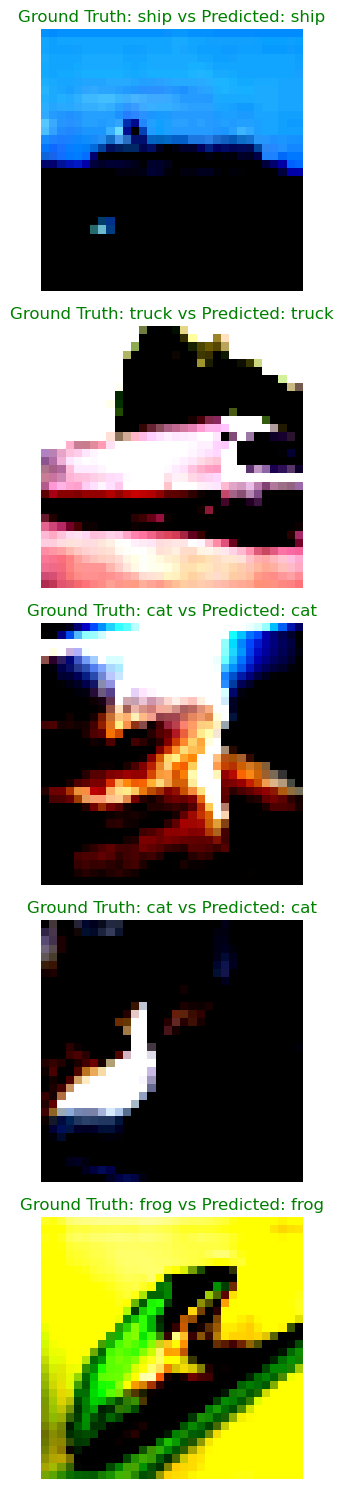

In [19]:
show_predictions(full_cifar_model, test_data_loader)

### 1.3 Plot graphs

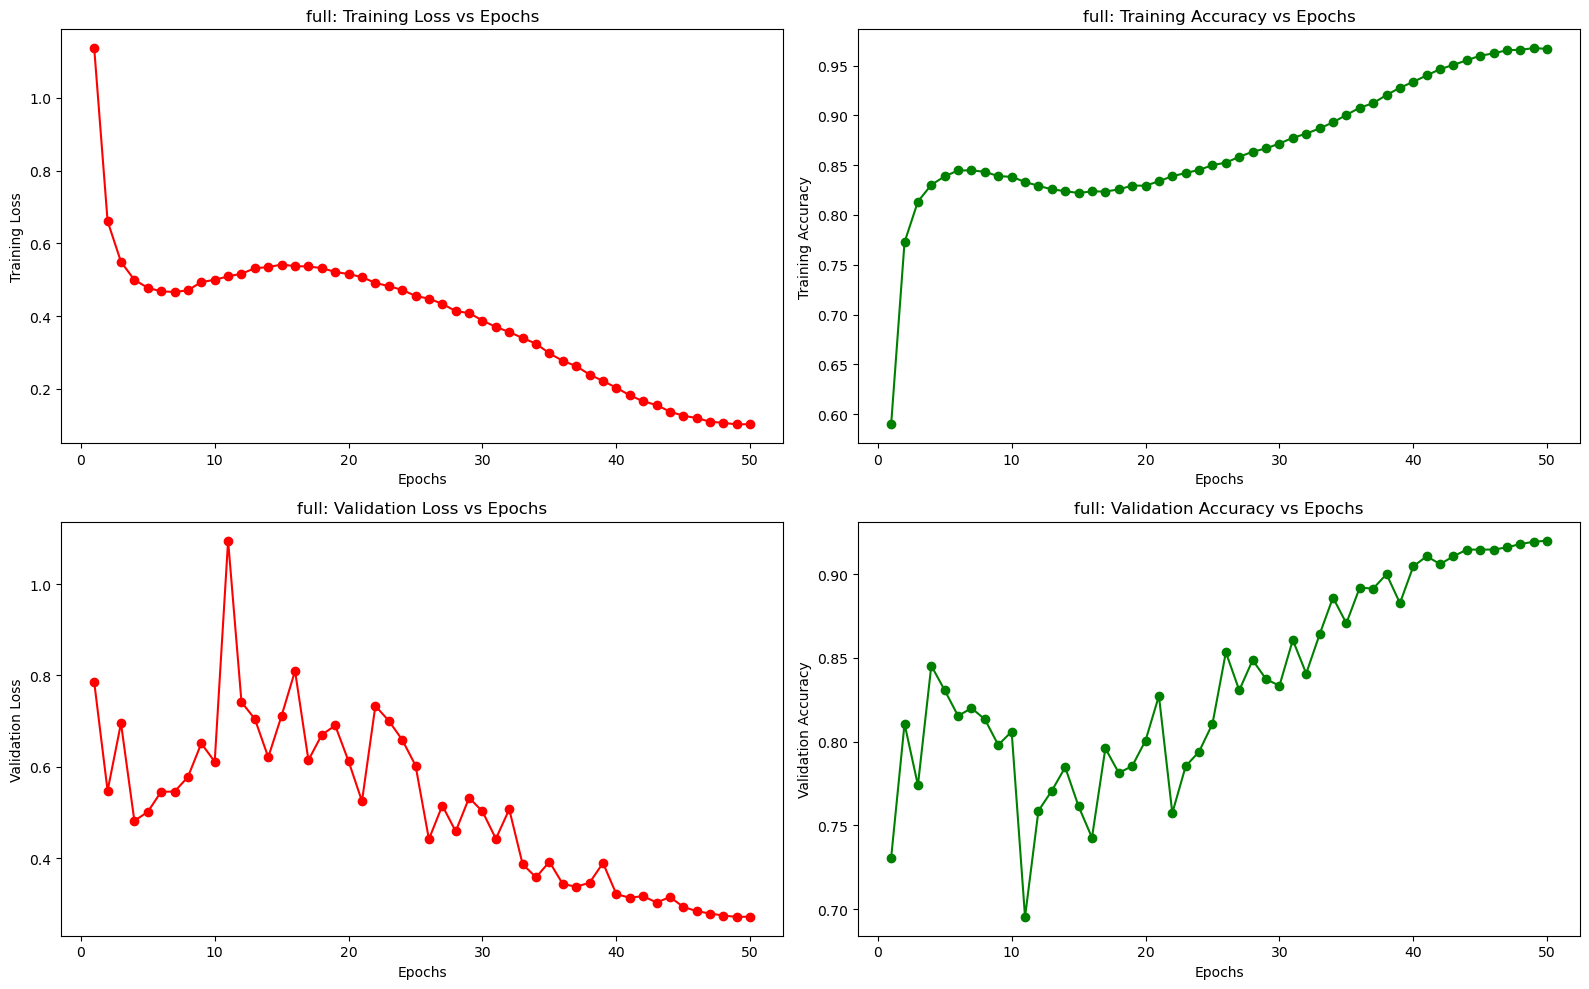

In [20]:
plot_model_training_stats(full_experiment, full_epoch_numbers, full_training_losses, full_validation_losses, full_training_accuracy, full_validation_accuracy)

# <u>Experiment 2: 1 instance per class dataset</u>

### 2.1 Train the model

In [6]:
one_experiment = "one"
one_cifar_model = CIFARClassifier()
one_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [7]:
one_epoch_numbers, one_training_losses, one_training_accuracy, one_validation_losses, one_validation_accuracy = train_model(
    one_cifar_model,
    train_data_num_1_loader,
    validation_data_loader,
    50,
    params,
    one_experiment,
    epoch_saver_count=1,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/50 [00:00<?, ?it/s]

Epoch 1/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1: train_loss: 2.252650499343872 | train_accuracy: 0.1 | val_loss: 2.3005739053090415 | val_accuracy: 0.098 
Going to save model @ Epoch:1
Save checkpointed the model at the path model_ckpts\one\model_epoch_1.pt


Epoch 2/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2: train_loss: 1.9057207107543945 | train_accuracy: 0.5 | val_loss: 2.2976248264312744 | val_accuracy: 0.098 
Going to save model @ Epoch:2
Save checkpointed the model at the path model_ckpts\one\model_epoch_2.pt


Epoch 3/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3: train_loss: 1.5284126996994019 | train_accuracy: 0.6 | val_loss: 2.297311782836914 | val_accuracy: 0.1 
Going to save model @ Epoch:3
Save checkpointed the model at the path model_ckpts\one\model_epoch_3.pt


Epoch 4/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4: train_loss: 1.1382577419281006 | train_accuracy: 0.9 | val_loss: 2.383069713910421 | val_accuracy: 0.11 
Going to save model @ Epoch:4
Save checkpointed the model at the path model_ckpts\one\model_epoch_4.pt


Epoch 5/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5: train_loss: 0.8520908355712891 | train_accuracy: 0.9 | val_loss: 2.9589432875315347 | val_accuracy: 0.12066666666666667 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\one\model_epoch_5.pt


Epoch 6/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6: train_loss: 0.5687488317489624 | train_accuracy: 0.9 | val_loss: 7.377177556355794 | val_accuracy: 0.09933333333333333 
Going to save model @ Epoch:6
Save checkpointed the model at the path model_ckpts\one\model_epoch_6.pt


Epoch 7/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 7: train_loss: 0.43314188718795776 | train_accuracy: 0.8 | val_loss: 34.840694427490234 | val_accuracy: 0.09866666666666667 
Going to save model @ Epoch:7
Save checkpointed the model at the path model_ckpts\one\model_epoch_7.pt


Epoch 8/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 8: train_loss: 0.5765892267227173 | train_accuracy: 0.9 | val_loss: 69.00818061828613 | val_accuracy: 0.1 
Going to save model @ Epoch:8
Save checkpointed the model at the path model_ckpts\one\model_epoch_8.pt


Epoch 9/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 9: train_loss: 0.29676610231399536 | train_accuracy: 0.9 | val_loss: 121.0221061706543 | val_accuracy: 0.10133333333333333 
Going to save model @ Epoch:9
Save checkpointed the model at the path model_ckpts\one\model_epoch_9.pt


Epoch 10/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 10: train_loss: 0.8142756223678589 | train_accuracy: 0.7 | val_loss: 77.63593673706055 | val_accuracy: 0.11133333333333334 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\one\model_epoch_10.pt


Epoch 11/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 11: train_loss: 1.5294042825698853 | train_accuracy: 0.8 | val_loss: 283.3837127685547 | val_accuracy: 0.09866666666666667 
Going to save model @ Epoch:11
Save checkpointed the model at the path model_ckpts\one\model_epoch_11.pt


Epoch 12/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 12: train_loss: 2.7412447929382324 | train_accuracy: 0.6 | val_loss: 253.59986623128256 | val_accuracy: 0.10533333333333333 
Going to save model @ Epoch:12
Save checkpointed the model at the path model_ckpts\one\model_epoch_12.pt


Epoch 13/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 13: train_loss: 2.69401216506958 | train_accuracy: 0.5 | val_loss: 390.49070739746094 | val_accuracy: 0.104 
Going to save model @ Epoch:13
Save checkpointed the model at the path model_ckpts\one\model_epoch_13.pt


Epoch 14/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.6226091384887695 | train_accuracy: 0.6 | val_loss: 330.07586669921875 | val_accuracy: 0.10466666666666667 
Going to save model @ Epoch:14
Save checkpointed the model at the path model_ckpts\one\model_epoch_14.pt


Epoch 15/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 15: train_loss: 1.397462248802185 | train_accuracy: 0.6 | val_loss: 262.7283121744792 | val_accuracy: 0.118 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\one\model_epoch_15.pt


Epoch 16/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 16: train_loss: 1.2100027799606323 | train_accuracy: 0.6 | val_loss: 215.07134246826172 | val_accuracy: 0.12333333333333334 
Going to save model @ Epoch:16
Save checkpointed the model at the path model_ckpts\one\model_epoch_16.pt


Epoch 17/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 17: train_loss: 1.5068295001983643 | train_accuracy: 0.5 | val_loss: 207.44024658203125 | val_accuracy: 0.128 
Going to save model @ Epoch:17
Save checkpointed the model at the path model_ckpts\one\model_epoch_17.pt


Epoch 18/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 18: train_loss: 0.3996531367301941 | train_accuracy: 0.9 | val_loss: 260.60687764485675 | val_accuracy: 0.10333333333333333 
Going to save model @ Epoch:18
Save checkpointed the model at the path model_ckpts\one\model_epoch_18.pt


Epoch 19/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 19: train_loss: 0.9854811429977417 | train_accuracy: 0.6 | val_loss: 299.7599589029948 | val_accuracy: 0.09533333333333334 
Going to save model @ Epoch:19
Save checkpointed the model at the path model_ckpts\one\model_epoch_19.pt


Epoch 20/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 20: train_loss: 0.6959582567214966 | train_accuracy: 0.7 | val_loss: 303.8766835530599 | val_accuracy: 0.09466666666666666 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\one\model_epoch_20.pt


Epoch 21/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 21: train_loss: 0.6960662603378296 | train_accuracy: 0.7 | val_loss: 263.9511896769206 | val_accuracy: 0.1 
Going to save model @ Epoch:21
Save checkpointed the model at the path model_ckpts\one\model_epoch_21.pt


Epoch 22/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 22: train_loss: 0.8086431622505188 | train_accuracy: 0.8 | val_loss: 208.4590581258138 | val_accuracy: 0.09866666666666667 
Going to save model @ Epoch:22
Save checkpointed the model at the path model_ckpts\one\model_epoch_22.pt


Epoch 23/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 23: train_loss: 0.13617582619190216 | train_accuracy: 1.0 | val_loss: 115.5635757446289 | val_accuracy: 0.11066666666666666 
Going to save model @ Epoch:23
Save checkpointed the model at the path model_ckpts\one\model_epoch_23.pt


Epoch 24/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 24: train_loss: 0.2993827164173126 | train_accuracy: 0.9 | val_loss: 85.5304578145345 | val_accuracy: 0.112 
Going to save model @ Epoch:24
Save checkpointed the model at the path model_ckpts\one\model_epoch_24.pt


Epoch 25/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 25: train_loss: 0.043272651731967926 | train_accuracy: 1.0 | val_loss: 72.82484181722005 | val_accuracy: 0.10933333333333334 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\one\model_epoch_25.pt


Epoch 26/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 26: train_loss: 0.46029648184776306 | train_accuracy: 0.8 | val_loss: 80.3148562113444 | val_accuracy: 0.12133333333333333 
Going to save model @ Epoch:26
Save checkpointed the model at the path model_ckpts\one\model_epoch_26.pt


Epoch 27/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.29149147868156433 | train_accuracy: 0.9 | val_loss: 97.75964101155598 | val_accuracy: 0.13066666666666665 
Going to save model @ Epoch:27
Save checkpointed the model at the path model_ckpts\one\model_epoch_27.pt


Epoch 28/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.005213587079197168 | train_accuracy: 1.0 | val_loss: 118.11323801676433 | val_accuracy: 0.11133333333333334 
Going to save model @ Epoch:28
Save checkpointed the model at the path model_ckpts\one\model_epoch_28.pt


Epoch 29/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.01760564185678959 | train_accuracy: 1.0 | val_loss: 133.08492279052734 | val_accuracy: 0.108 
Going to save model @ Epoch:29
Save checkpointed the model at the path model_ckpts\one\model_epoch_29.pt


Epoch 30/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.06177516654133797 | train_accuracy: 1.0 | val_loss: 134.27877298990884 | val_accuracy: 0.11133333333333334 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\one\model_epoch_30.pt


Epoch 31/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 31: train_loss: 1.329486608505249 | train_accuracy: 0.8 | val_loss: 102.53192392985027 | val_accuracy: 0.12 
Going to save model @ Epoch:31
Save checkpointed the model at the path model_ckpts\one\model_epoch_31.pt


Epoch 32/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 32: train_loss: 0.11685218662023544 | train_accuracy: 0.9 | val_loss: 82.91795349121094 | val_accuracy: 0.134 
Going to save model @ Epoch:32
Save checkpointed the model at the path model_ckpts\one\model_epoch_32.pt


Epoch 33/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 33: train_loss: 0.22198709845542908 | train_accuracy: 0.9 | val_loss: 69.97670237223308 | val_accuracy: 0.14466666666666667 
Going to save model @ Epoch:33
Save checkpointed the model at the path model_ckpts\one\model_epoch_33.pt


Epoch 34/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 34: train_loss: 0.2513797879219055 | train_accuracy: 0.9 | val_loss: 62.81774012247721 | val_accuracy: 0.146 
Going to save model @ Epoch:34
Save checkpointed the model at the path model_ckpts\one\model_epoch_34.pt


Epoch 35/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 35: train_loss: 0.0007491279975511134 | train_accuracy: 1.0 | val_loss: 56.70673624674479 | val_accuracy: 0.14 
Going to save model @ Epoch:35
Save checkpointed the model at the path model_ckpts\one\model_epoch_35.pt


Epoch 36/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 36: train_loss: 0.09320341050624847 | train_accuracy: 0.9 | val_loss: 51.11126899719238 | val_accuracy: 0.13 
Going to save model @ Epoch:36
Save checkpointed the model at the path model_ckpts\one\model_epoch_36.pt


Epoch 37/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 37: train_loss: 0.00015982789045665413 | train_accuracy: 1.0 | val_loss: 46.12346649169922 | val_accuracy: 0.12533333333333332 
Going to save model @ Epoch:37
Save checkpointed the model at the path model_ckpts\one\model_epoch_37.pt


Epoch 38/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 38: train_loss: 0.0004995245835743845 | train_accuracy: 1.0 | val_loss: 42.18852615356445 | val_accuracy: 0.12333333333333334 
Going to save model @ Epoch:38
Save checkpointed the model at the path model_ckpts\one\model_epoch_38.pt


Epoch 39/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 39: train_loss: 0.000388846528949216 | train_accuracy: 1.0 | val_loss: 38.9769484202067 | val_accuracy: 0.12533333333333332 
Going to save model @ Epoch:39
Save checkpointed the model at the path model_ckpts\one\model_epoch_39.pt


Epoch 40/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 40: train_loss: 0.023318622261285782 | train_accuracy: 1.0 | val_loss: 35.95534642537435 | val_accuracy: 0.12266666666666666 
Going to save model @ Epoch:40
Save checkpointed the model at the path model_ckpts\one\model_epoch_40.pt


Epoch 41/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 41: train_loss: 0.23472464084625244 | train_accuracy: 0.9 | val_loss: 33.364020029703774 | val_accuracy: 0.12333333333333334 
Going to save model @ Epoch:41
Save checkpointed the model at the path model_ckpts\one\model_epoch_41.pt


Epoch 42/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 42: train_loss: 0.00023079061065800488 | train_accuracy: 1.0 | val_loss: 31.397247314453125 | val_accuracy: 0.12133333333333333 
Going to save model @ Epoch:42
Save checkpointed the model at the path model_ckpts\one\model_epoch_42.pt


Epoch 43/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 43: train_loss: 0.01752234622836113 | train_accuracy: 1.0 | val_loss: 29.594220797220867 | val_accuracy: 0.11666666666666667 
Going to save model @ Epoch:43
Save checkpointed the model at the path model_ckpts\one\model_epoch_43.pt


Epoch 44/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 44: train_loss: 0.12658868730068207 | train_accuracy: 0.9 | val_loss: 27.417983690897625 | val_accuracy: 0.11866666666666667 
Going to save model @ Epoch:44
Save checkpointed the model at the path model_ckpts\one\model_epoch_44.pt


Epoch 45/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 45: train_loss: 0.0003175499150529504 | train_accuracy: 1.0 | val_loss: 26.119073232014973 | val_accuracy: 0.12066666666666667 
Going to save model @ Epoch:45
Save checkpointed the model at the path model_ckpts\one\model_epoch_45.pt


Epoch 46/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 46: train_loss: 0.00023727370717097074 | train_accuracy: 1.0 | val_loss: 24.728036244710285 | val_accuracy: 0.12933333333333333 
Going to save model @ Epoch:46
Save checkpointed the model at the path model_ckpts\one\model_epoch_46.pt


Epoch 47/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 47: train_loss: 0.001915002940222621 | train_accuracy: 1.0 | val_loss: 23.715441068013508 | val_accuracy: 0.128 
Going to save model @ Epoch:47
Save checkpointed the model at the path model_ckpts\one\model_epoch_47.pt


Epoch 48/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 48: train_loss: 0.011279303580522537 | train_accuracy: 1.0 | val_loss: 22.862708409627277 | val_accuracy: 0.13 
Going to save model @ Epoch:48
Save checkpointed the model at the path model_ckpts\one\model_epoch_48.pt


Epoch 49/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 49: train_loss: 0.01757965423166752 | train_accuracy: 1.0 | val_loss: 22.151213963826496 | val_accuracy: 0.13333333333333333 
Going to save model @ Epoch:49
Save checkpointed the model at the path model_ckpts\one\model_epoch_49.pt


Epoch 50/50:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 50: train_loss: 0.0017813211306929588 | train_accuracy: 1.0 | val_loss: 21.622689882914226 | val_accuracy: 0.13266666666666665 
Going to save model @ Epoch:50
Save checkpointed the model at the path model_ckpts\one\model_epoch_50.pt


### 2.2 Test the model

In [8]:
one_cifar_test_accuracy, one_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, one_cifar_model, test_data_loader)
print(f"Test loss: {one_cifar_test_loss} | Test accuracy: {one_cifar_test_accuracy}")

Test loss: 21.778526418349323 | Test accuracy: 0.1308235294117647


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


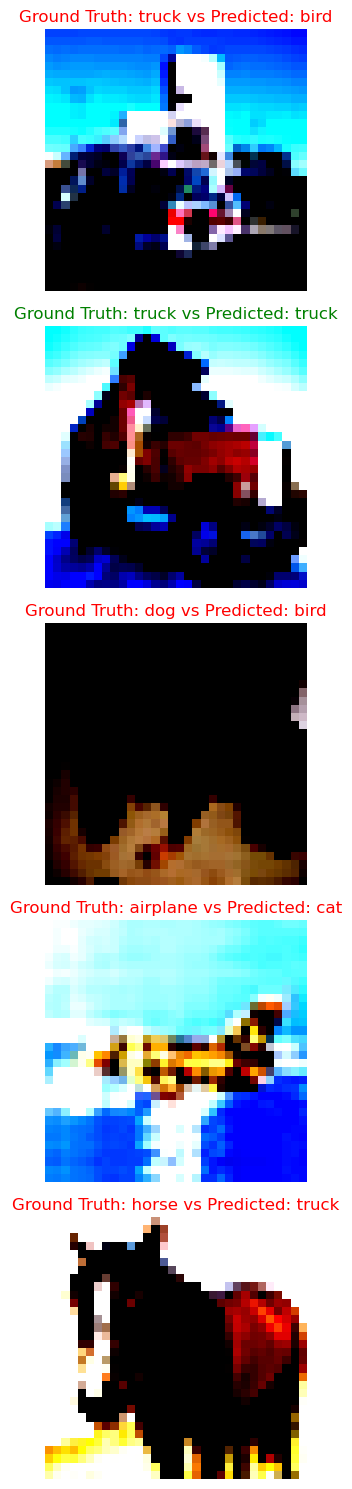

In [9]:
show_predictions(one_cifar_model, test_data_loader)

### 2.3 Plot graphs

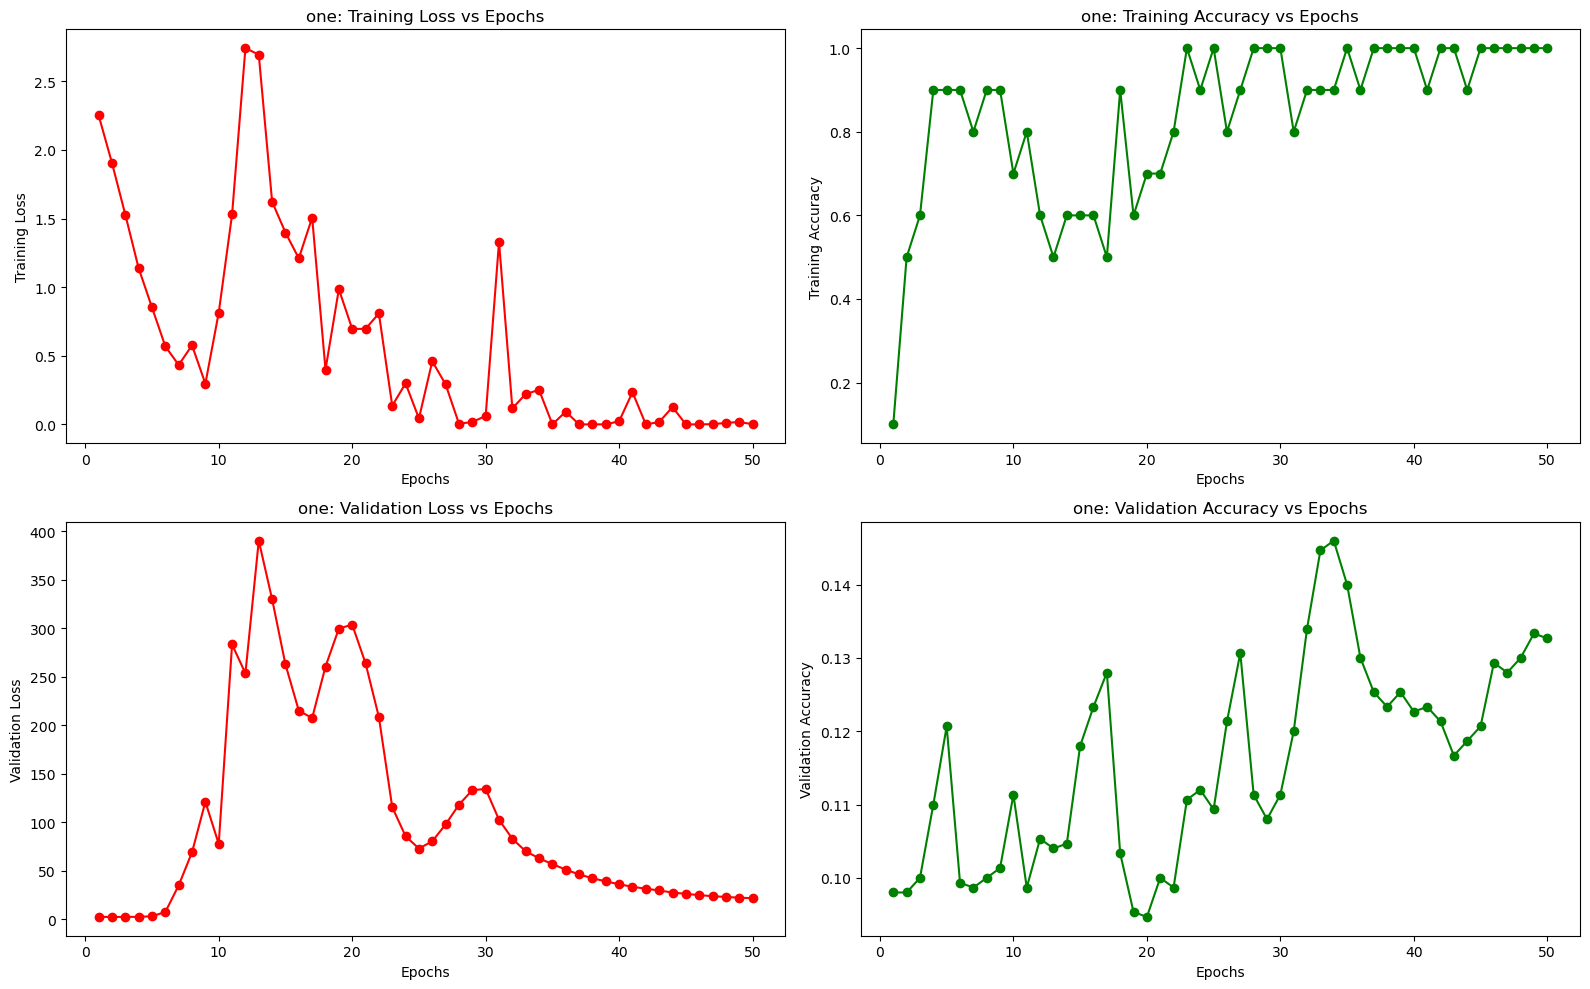

In [10]:
plot_model_training_stats(one_experiment, one_epoch_numbers, one_training_losses, one_validation_losses, one_training_accuracy, one_validation_accuracy)

# <u>Experiment 3: 10 instance per class dataset</u>

### 3.1 Train the model

In [11]:
ten_experiment = "ten"
ten_cifar_model = CIFARClassifier()
ten_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [12]:
ten_epoch_numbers, ten_training_losses, ten_training_accuracy, ten_validation_losses, ten_validation_accuracy = train_model(
    ten_cifar_model,
    train_data_num_10_loader,
    validation_data_loader,
    30,
    params,
    ten_experiment,
    epoch_saver_count=5,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/30 [00:00<?, ?it/s]

Epoch 1/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1: train_loss: 2.5757875442504883 | train_accuracy: 0.09 | val_loss: 2.2957889238993325 | val_accuracy: 0.11066666666666666 


Epoch 2/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2: train_loss: 2.221938371658325 | train_accuracy: 0.2 | val_loss: 2.2836639086405435 | val_accuracy: 0.12466666666666666 


Epoch 3/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3: train_loss: 2.077033281326294 | train_accuracy: 0.27 | val_loss: 2.4028634230295816 | val_accuracy: 0.112 


Epoch 4/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4: train_loss: 1.9120219945907593 | train_accuracy: 0.26 | val_loss: 3.555079778035482 | val_accuracy: 0.10933333333333334 


Epoch 5/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5: train_loss: 1.9873285293579102 | train_accuracy: 0.2 | val_loss: 4.209119558334351 | val_accuracy: 0.13066666666666665 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\ten\model_epoch_5.pt


Epoch 6/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6: train_loss: 2.775137424468994 | train_accuracy: 0.15 | val_loss: 23.684838612874348 | val_accuracy: 0.13733333333333334 


Epoch 7/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 7: train_loss: 2.347017765045166 | train_accuracy: 0.2 | val_loss: 51.16382853190104 | val_accuracy: 0.104 


Epoch 8/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 8: train_loss: 2.102534055709839 | train_accuracy: 0.2 | val_loss: 84.65448633829753 | val_accuracy: 0.104 


Epoch 9/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 9: train_loss: 1.934677243232727 | train_accuracy: 0.21 | val_loss: 59.78885142008463 | val_accuracy: 0.09933333333333333 


Epoch 10/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 10: train_loss: 1.9860540628433228 | train_accuracy: 0.24 | val_loss: 65.89842859903972 | val_accuracy: 0.108 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\ten\model_epoch_10.pt


Epoch 11/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 11: train_loss: 1.7869220972061157 | train_accuracy: 0.24 | val_loss: 50.97557512919108 | val_accuracy: 0.09933333333333333 


Epoch 12/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 12: train_loss: 1.7798036336898804 | train_accuracy: 0.31 | val_loss: 40.077996571858726 | val_accuracy: 0.12266666666666666 


Epoch 13/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 13: train_loss: 1.781180739402771 | train_accuracy: 0.24 | val_loss: 26.734249432881672 | val_accuracy: 0.10266666666666667 


Epoch 14/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.6894965171813965 | train_accuracy: 0.27 | val_loss: 25.1217254002889 | val_accuracy: 0.09533333333333334 


Epoch 15/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 15: train_loss: 1.624189019203186 | train_accuracy: 0.28 | val_loss: 21.492194811503094 | val_accuracy: 0.09466666666666666 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\ten\model_epoch_15.pt


Epoch 16/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 16: train_loss: 1.695329189300537 | train_accuracy: 0.31 | val_loss: 15.737856388092041 | val_accuracy: 0.094 


Epoch 17/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 17: train_loss: 1.5355198383331299 | train_accuracy: 0.35 | val_loss: 10.888146559397379 | val_accuracy: 0.11933333333333333 


Epoch 18/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 18: train_loss: 1.6417083740234375 | train_accuracy: 0.36 | val_loss: 8.000846147537231 | val_accuracy: 0.12 


Epoch 19/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 19: train_loss: 1.4716285467147827 | train_accuracy: 0.4 | val_loss: 7.670987367630005 | val_accuracy: 0.13 


Epoch 20/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 20: train_loss: 1.5360034704208374 | train_accuracy: 0.36 | val_loss: 7.9560465812683105 | val_accuracy: 0.13333333333333333 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\ten\model_epoch_20.pt


Epoch 21/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 21: train_loss: 1.4574382305145264 | train_accuracy: 0.36 | val_loss: 7.2675308386484785 | val_accuracy: 0.13 


Epoch 22/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 22: train_loss: 1.536879062652588 | train_accuracy: 0.35 | val_loss: 6.269857883453369 | val_accuracy: 0.13666666666666666 


Epoch 23/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 23: train_loss: 1.4208884239196777 | train_accuracy: 0.43 | val_loss: 5.195541858673096 | val_accuracy: 0.154 


Epoch 24/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 24: train_loss: 1.3867087364196777 | train_accuracy: 0.39 | val_loss: 4.354344765345256 | val_accuracy: 0.16933333333333334 


Epoch 25/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 25: train_loss: 1.334004521369934 | train_accuracy: 0.54 | val_loss: 3.757162610689799 | val_accuracy: 0.19 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\ten\model_epoch_25.pt


Epoch 26/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 26: train_loss: 1.3318158388137817 | train_accuracy: 0.44 | val_loss: 3.39758030573527 | val_accuracy: 0.19866666666666666 


Epoch 27/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 27: train_loss: 1.3483307361602783 | train_accuracy: 0.51 | val_loss: 3.143425981203715 | val_accuracy: 0.20333333333333334 


Epoch 28/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 28: train_loss: 1.3426798582077026 | train_accuracy: 0.47 | val_loss: 2.970240592956543 | val_accuracy: 0.21133333333333335 


Epoch 29/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 29: train_loss: 1.366382122039795 | train_accuracy: 0.43 | val_loss: 2.8409802118937173 | val_accuracy: 0.22866666666666666 


Epoch 30/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 30: train_loss: 1.3359167575836182 | train_accuracy: 0.48 | val_loss: 2.743097941080729 | val_accuracy: 0.232 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\ten\model_epoch_30.pt


### 3.2 Test the model


In [13]:
ten_cifar_test_accuracy, ten_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, ten_cifar_model, test_data_loader)
print(f"Test loss: {ten_cifar_test_loss} | Test accuracy: {ten_cifar_test_accuracy}")

Test loss: 2.8683543906492344 | Test accuracy: 0.21423529411764705


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


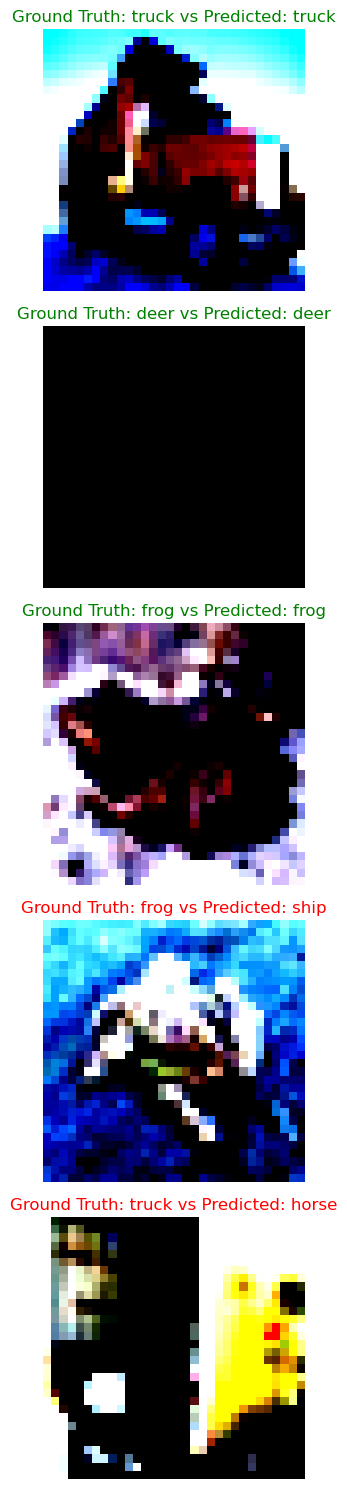

In [14]:
show_predictions(ten_cifar_model, test_data_loader)

### 3.3 Plot graphs

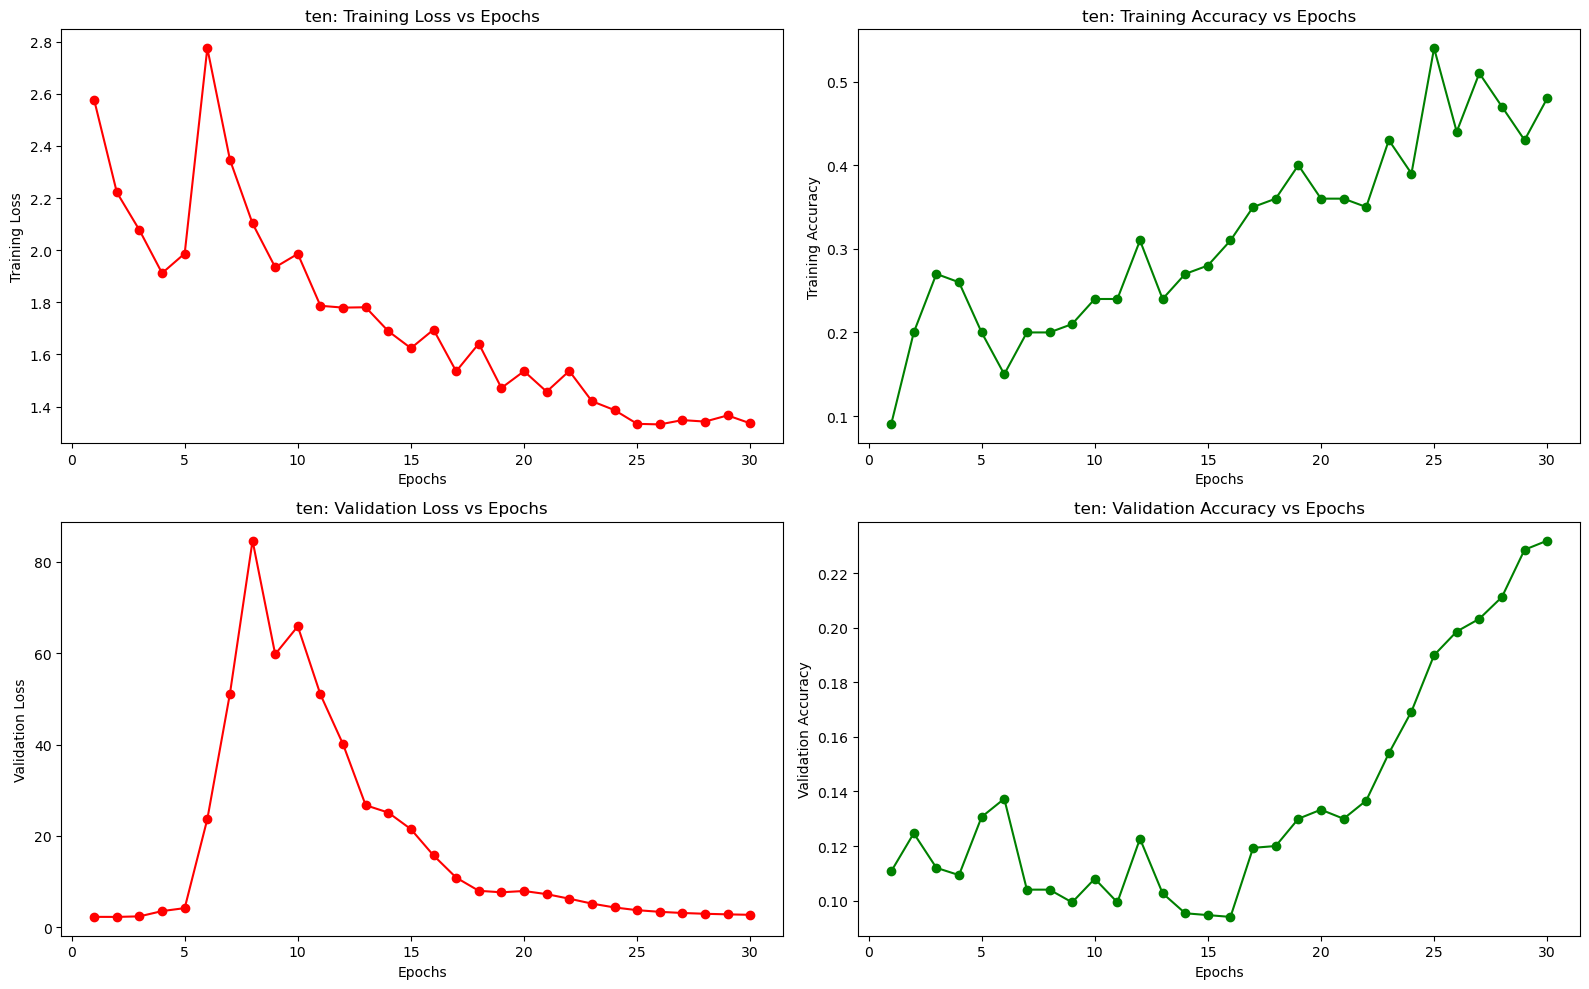

In [15]:
plot_model_training_stats(ten_experiment, ten_epoch_numbers, ten_training_losses, ten_validation_losses, ten_training_accuracy, ten_validation_accuracy)

# <u>Experiment 4: 100 instance per class dataset</u>

### 4.1 Train the model

In [16]:
hund_experiment = "hundred"
hund_cifar_model = CIFARClassifier()
hund_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [17]:
hund_epoch_numbers, hund_training_losses, hund_training_accuracy, hund_validation_losses, hund_validation_accuracy = train_model(
    hund_cifar_model,
    train_data_num_100_loader,
    validation_data_loader,
    30,
    params,
    hund_experiment,
    epoch_saver_count=5,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/30 [00:00<?, ?it/s]

Epoch 1/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1: train_loss: 2.2851173281669617 | train_accuracy: 0.156 | val_loss: 2.245465397834778 | val_accuracy: 0.17333333333333334 


Epoch 2/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 2: train_loss: 2.0205473005771637 | train_accuracy: 0.256 | val_loss: 2.0095805724461875 | val_accuracy: 0.262 


Epoch 3/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 3: train_loss: 1.9173579514026642 | train_accuracy: 0.303 | val_loss: 3.191034992535909 | val_accuracy: 0.15933333333333333 


Epoch 4/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 4: train_loss: 1.8771075904369354 | train_accuracy: 0.297 | val_loss: 3.368271311124166 | val_accuracy: 0.20533333333333334 


Epoch 5/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 5: train_loss: 1.866018384695053 | train_accuracy: 0.284 | val_loss: 9.89360268910726 | val_accuracy: 0.17533333333333334 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_5.pt


Epoch 6/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 6: train_loss: 1.8529925048351288 | train_accuracy: 0.308 | val_loss: 4.306299448013306 | val_accuracy: 0.21533333333333332 


Epoch 7/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 7: train_loss: 1.7288521230220795 | train_accuracy: 0.353 | val_loss: 2.609631657600403 | val_accuracy: 0.29333333333333333 


Epoch 8/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 8: train_loss: 1.7267451286315918 | train_accuracy: 0.371 | val_loss: 3.900147318840027 | val_accuracy: 0.202 


Epoch 9/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 9: train_loss: 1.592044860124588 | train_accuracy: 0.383 | val_loss: 6.36748472849528 | val_accuracy: 0.14866666666666667 


Epoch 10/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 10: train_loss: 1.6266499757766724 | train_accuracy: 0.397 | val_loss: 3.367774327596029 | val_accuracy: 0.20866666666666667 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_10.pt


Epoch 11/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 11: train_loss: 1.5983183681964874 | train_accuracy: 0.379 | val_loss: 2.187738319238027 | val_accuracy: 0.33866666666666667 


Epoch 12/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 12: train_loss: 1.4688870012760162 | train_accuracy: 0.448 | val_loss: 2.2534523804982505 | val_accuracy: 0.3333333333333333 


Epoch 13/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 13: train_loss: 1.4981979727745056 | train_accuracy: 0.418 | val_loss: 1.714378297328949 | val_accuracy: 0.37666666666666665 


Epoch 14/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.413234680891037 | train_accuracy: 0.462 | val_loss: 2.0626091758410134 | val_accuracy: 0.33666666666666667 


Epoch 15/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 15: train_loss: 1.3328045904636383 | train_accuracy: 0.483 | val_loss: 1.6819855372111003 | val_accuracy: 0.3893333333333333 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_15.pt


Epoch 16/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 16: train_loss: 1.3301185071468353 | train_accuracy: 0.482 | val_loss: 1.5051384965578716 | val_accuracy: 0.45 


Epoch 17/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 17: train_loss: 1.2793118059635162 | train_accuracy: 0.529 | val_loss: 1.6065616607666016 | val_accuracy: 0.43733333333333335 


Epoch 18/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 18: train_loss: 1.2016314566135406 | train_accuracy: 0.551 | val_loss: 1.6179408033688862 | val_accuracy: 0.41933333333333334 


Epoch 19/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 19: train_loss: 1.1832651495933533 | train_accuracy: 0.542 | val_loss: 1.6414255897204082 | val_accuracy: 0.414 


Epoch 20/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 20: train_loss: 1.1199513971805573 | train_accuracy: 0.573 | val_loss: 1.6214723984400432 | val_accuracy: 0.42133333333333334 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_20.pt


Epoch 21/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 21: train_loss: 1.029399260878563 | train_accuracy: 0.617 | val_loss: 1.6156806548436482 | val_accuracy: 0.4686666666666667 


Epoch 22/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 22: train_loss: 1.0210033804178238 | train_accuracy: 0.604 | val_loss: 1.3959604501724243 | val_accuracy: 0.5053333333333333 


Epoch 23/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 23: train_loss: 0.9693329483270645 | train_accuracy: 0.629 | val_loss: 1.4701197544733684 | val_accuracy: 0.49666666666666665 


Epoch 24/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 24: train_loss: 0.8935652524232864 | train_accuracy: 0.658 | val_loss: 1.5289952158927917 | val_accuracy: 0.49333333333333335 


Epoch 25/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 25: train_loss: 0.8820355832576752 | train_accuracy: 0.667 | val_loss: 1.466848909854889 | val_accuracy: 0.5193333333333333 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_25.pt


Epoch 26/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 26: train_loss: 0.8333100229501724 | train_accuracy: 0.688 | val_loss: 1.4165626962979634 | val_accuracy: 0.51 


Epoch 27/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.8060295730829239 | train_accuracy: 0.679 | val_loss: 1.4085146188735962 | val_accuracy: 0.53 


Epoch 28/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.784380242228508 | train_accuracy: 0.694 | val_loss: 1.4396843711535137 | val_accuracy: 0.5253333333333333 


Epoch 29/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.7612800300121307 | train_accuracy: 0.724 | val_loss: 1.446074942747752 | val_accuracy: 0.5253333333333333 


Epoch 30/30:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.7746534198522568 | train_accuracy: 0.72 | val_loss: 1.4357133309046428 | val_accuracy: 0.526 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_30.pt


### 4.2 Test the model

In [18]:
hund_cifar_test_accuracy, hund_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, hund_cifar_model, test_data_loader)
print(f"Test loss: {hund_cifar_test_loss} | Test accuracy: {hund_cifar_test_accuracy}")

Test loss: 1.449637202655568 | Test accuracy: 0.5189411764705882


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


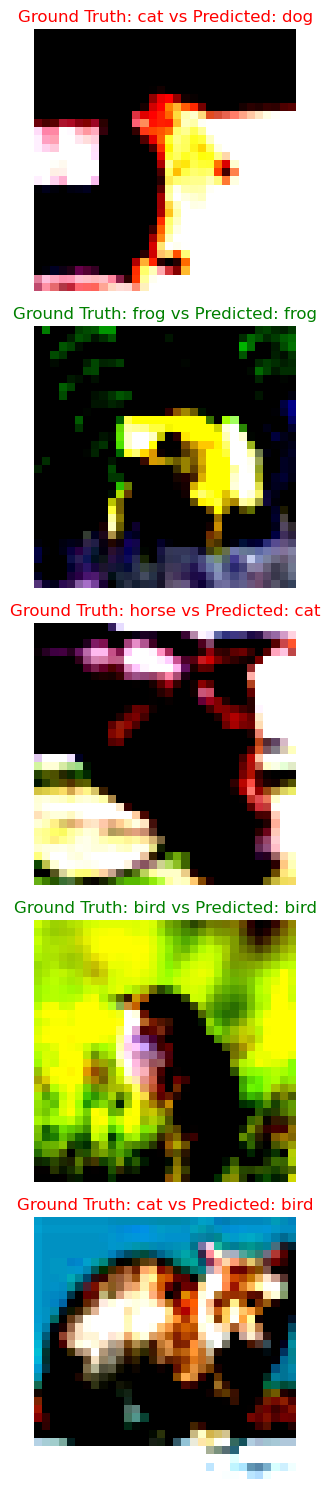

In [19]:
show_predictions(hund_cifar_model, test_data_loader)

### 4.3 Plot graphs

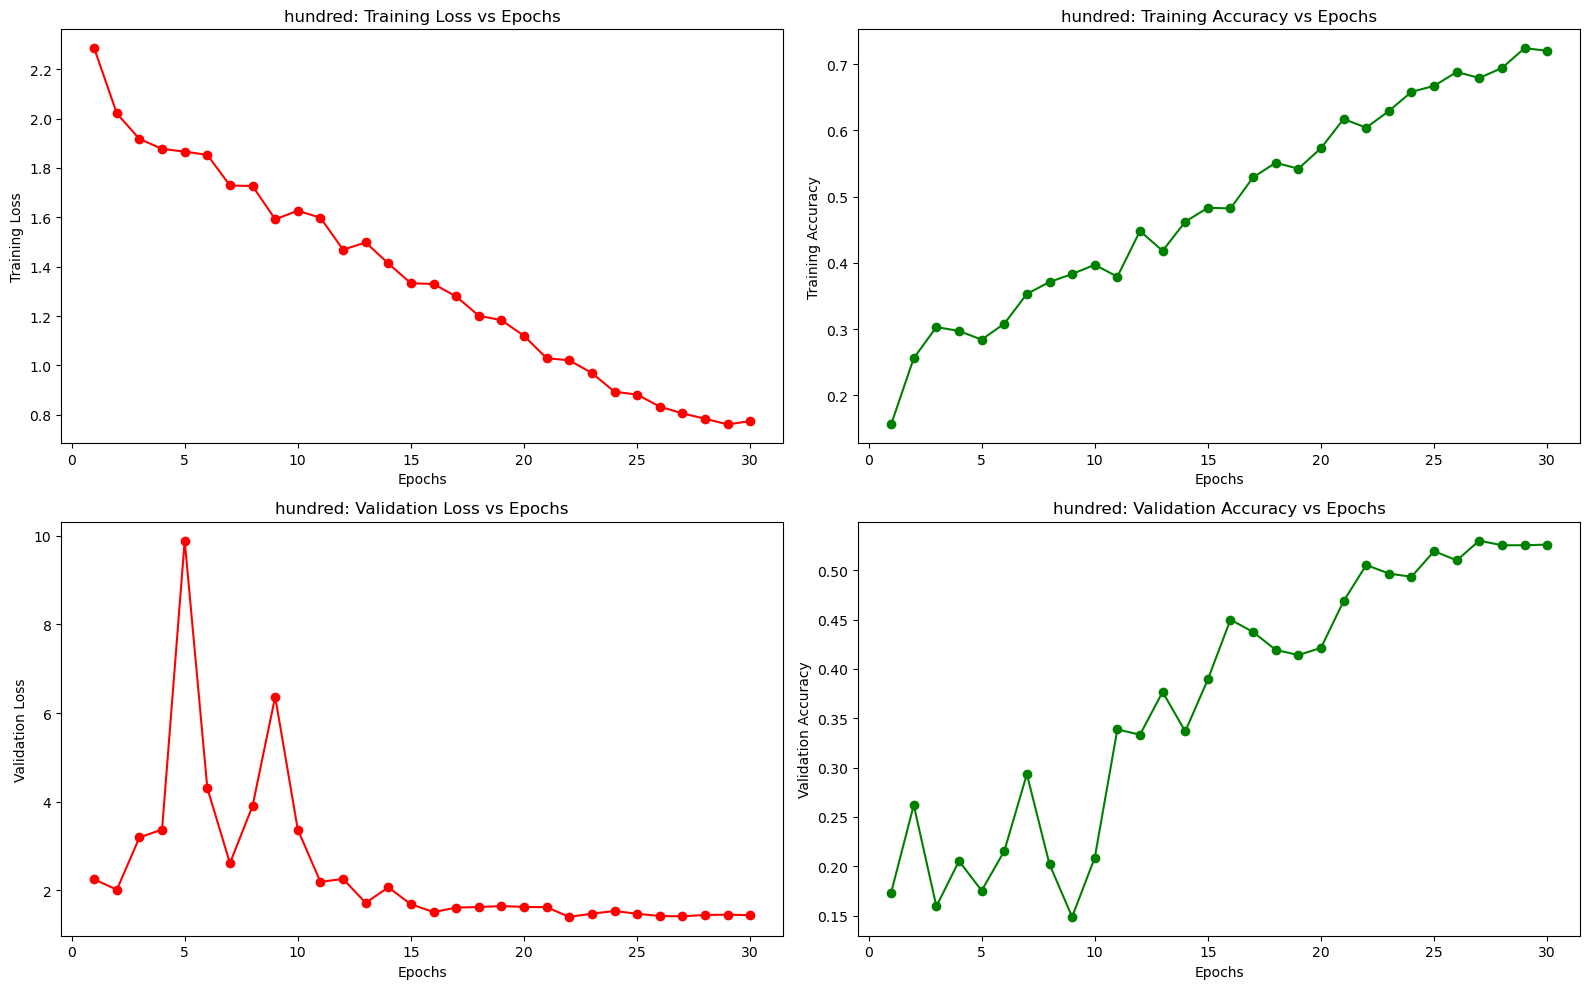

In [20]:
plot_model_training_stats(hund_experiment, hund_epoch_numbers, hund_training_losses, hund_validation_losses, hund_training_accuracy, hund_validation_accuracy)

# <u>Experiment 5: 1000 instance per class dataset</u>

### 5.1 Train the model

In [21]:
thous_experiment = "thousand"
thous_cifar_model = CIFARClassifier()
thous_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [22]:
thous_epoch_numbers, thous_training_losses, thous_training_accuracy, thous_validation_losses, thous_validation_accuracy = train_model(
    thous_cifar_model,
    train_data_num_1000_loader,
    validation_data_loader,
    30,
    params,
    thous_experiment,
    epoch_saver_count=5,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/30 [00:00<?, ?it/s]

Epoch 1/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 1: train_loss: 1.8364276558160781 | train_accuracy: 0.3095 | val_loss: 2.4415015379587808 | val_accuracy: 0.2786666666666667 


Epoch 2/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 2: train_loss: 1.5853843480348586 | train_accuracy: 0.4121 | val_loss: 1.520387589931488 | val_accuracy: 0.446 


Epoch 3/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 3: train_loss: 1.4990619122982025 | train_accuracy: 0.4537 | val_loss: 2.2443565130233765 | val_accuracy: 0.314 


Epoch 4/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 4: train_loss: 1.455667221546173 | train_accuracy: 0.469 | val_loss: 1.5657228032747905 | val_accuracy: 0.44866666666666666 


Epoch 5/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 5: train_loss: 1.3953642964363098 | train_accuracy: 0.493 | val_loss: 1.82437930504481 | val_accuracy: 0.3993333333333333 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_5.pt


Epoch 6/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 6: train_loss: 1.287201851606369 | train_accuracy: 0.5387 | val_loss: 1.9159848888715107 | val_accuracy: 0.3973333333333333 


Epoch 7/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 7: train_loss: 1.318413832783699 | train_accuracy: 0.5398 | val_loss: 1.8503079215685527 | val_accuracy: 0.44 


Epoch 8/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 8: train_loss: 1.3091979011893273 | train_accuracy: 0.5392 | val_loss: 1.8796533942222595 | val_accuracy: 0.4086666666666667 


Epoch 9/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 9: train_loss: 1.2068652987480164 | train_accuracy: 0.5723 | val_loss: 1.4593556722005208 | val_accuracy: 0.5233333333333333 


Epoch 10/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 10: train_loss: 1.1678803592920304 | train_accuracy: 0.5863 | val_loss: 1.4658267696698506 | val_accuracy: 0.5466666666666666 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_10.pt


Epoch 11/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 11: train_loss: 1.182220032811165 | train_accuracy: 0.5854 | val_loss: 3.5056430101394653 | val_accuracy: 0.326 


Epoch 12/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 12: train_loss: 1.2116083294153213 | train_accuracy: 0.5797 | val_loss: 1.4288275639216106 | val_accuracy: 0.5293333333333333 


Epoch 13/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 13: train_loss: 1.0566540032625198 | train_accuracy: 0.6218 | val_loss: 1.2101925611495972 | val_accuracy: 0.596 


Epoch 14/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.0168592765927316 | train_accuracy: 0.6503 | val_loss: 1.7820475498835247 | val_accuracy: 0.472 


Epoch 15/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 15: train_loss: 1.0615606322884559 | train_accuracy: 0.6352 | val_loss: 1.3558611472447712 | val_accuracy: 0.5973333333333334 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_15.pt


Epoch 16/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 16: train_loss: 1.110455995798111 | train_accuracy: 0.603 | val_loss: 1.1415282289187114 | val_accuracy: 0.6226666666666667 


Epoch 17/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 17: train_loss: 0.9280742838978767 | train_accuracy: 0.685 | val_loss: 0.9489507377147675 | val_accuracy: 0.672 


Epoch 18/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 18: train_loss: 0.8607552900910378 | train_accuracy: 0.7087 | val_loss: 0.9967250327269236 | val_accuracy: 0.6766666666666666 


Epoch 19/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 19: train_loss: 0.8441689148545265 | train_accuracy: 0.7139 | val_loss: 0.96259938677152 | val_accuracy: 0.6846666666666666 


Epoch 20/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 20: train_loss: 0.767388467490673 | train_accuracy: 0.7358 | val_loss: 0.7182894349098206 | val_accuracy: 0.7713333333333333 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_20.pt


Epoch 21/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 21: train_loss: 0.7136345967650414 | train_accuracy: 0.7599 | val_loss: 0.7387101550896963 | val_accuracy: 0.756 


Epoch 22/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 22: train_loss: 0.7053516328334808 | train_accuracy: 0.7548 | val_loss: 0.7812342246373495 | val_accuracy: 0.7306666666666667 


Epoch 23/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 23: train_loss: 0.6264880746603012 | train_accuracy: 0.7875 | val_loss: 0.6132050355275472 | val_accuracy: 0.796 


Epoch 24/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 24: train_loss: 0.5569257222115993 | train_accuracy: 0.8054 | val_loss: 0.6426506340503693 | val_accuracy: 0.7833333333333333 


Epoch 25/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 25: train_loss: 0.4988432973623276 | train_accuracy: 0.8238 | val_loss: 0.6086795230706533 | val_accuracy: 0.8006666666666666 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_25.pt


Epoch 26/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 26: train_loss: 0.45984120965003966 | train_accuracy: 0.8393 | val_loss: 0.5590428014596304 | val_accuracy: 0.8113333333333334 


Epoch 27/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.401514195650816 | train_accuracy: 0.8588 | val_loss: 0.5465933581193289 | val_accuracy: 0.8253333333333334 


Epoch 28/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.3843818441033363 | train_accuracy: 0.8691 | val_loss: 0.5165451268355051 | val_accuracy: 0.836 


Epoch 29/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.3709278956055641 | train_accuracy: 0.8757 | val_loss: 0.5130757590134939 | val_accuracy: 0.834 


Epoch 30/30:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.3551333285868168 | train_accuracy: 0.8795 | val_loss: 0.5241218060255051 | val_accuracy: 0.8366666666666667 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_30.pt


### 5.2 Test the model

In [23]:
thous_cifar_test_accuracy, thous_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, thous_cifar_model, test_data_loader)
print(f"Test loss: {thous_cifar_test_loss} | Test accuracy: {thous_cifar_test_accuracy}")

Test loss: 0.5286459204028634 | Test accuracy: 0.8250588235294117


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


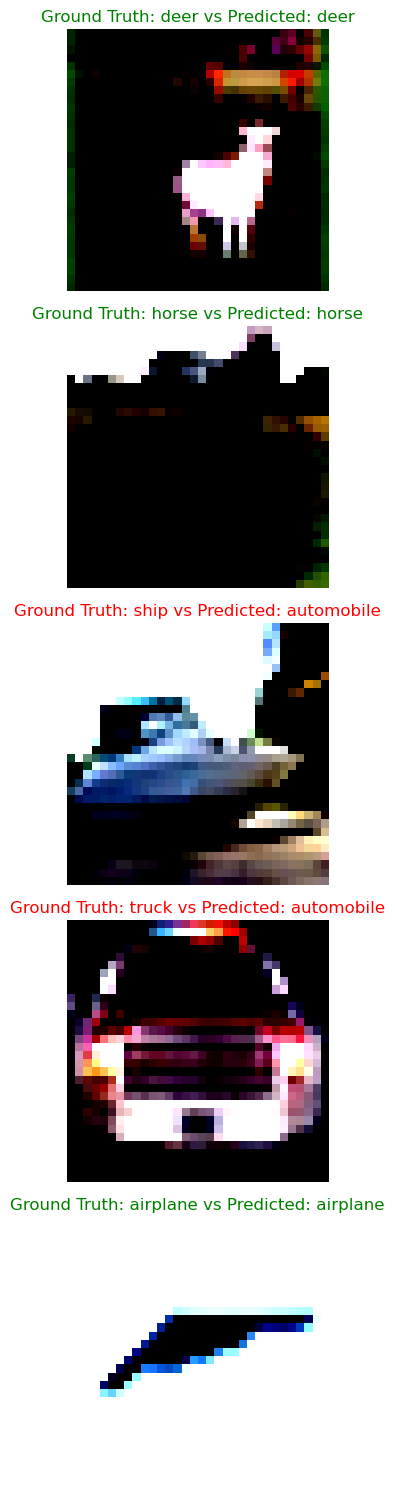

In [24]:
show_predictions(thous_cifar_model, test_data_loader)

### 5.3 Plot graphs

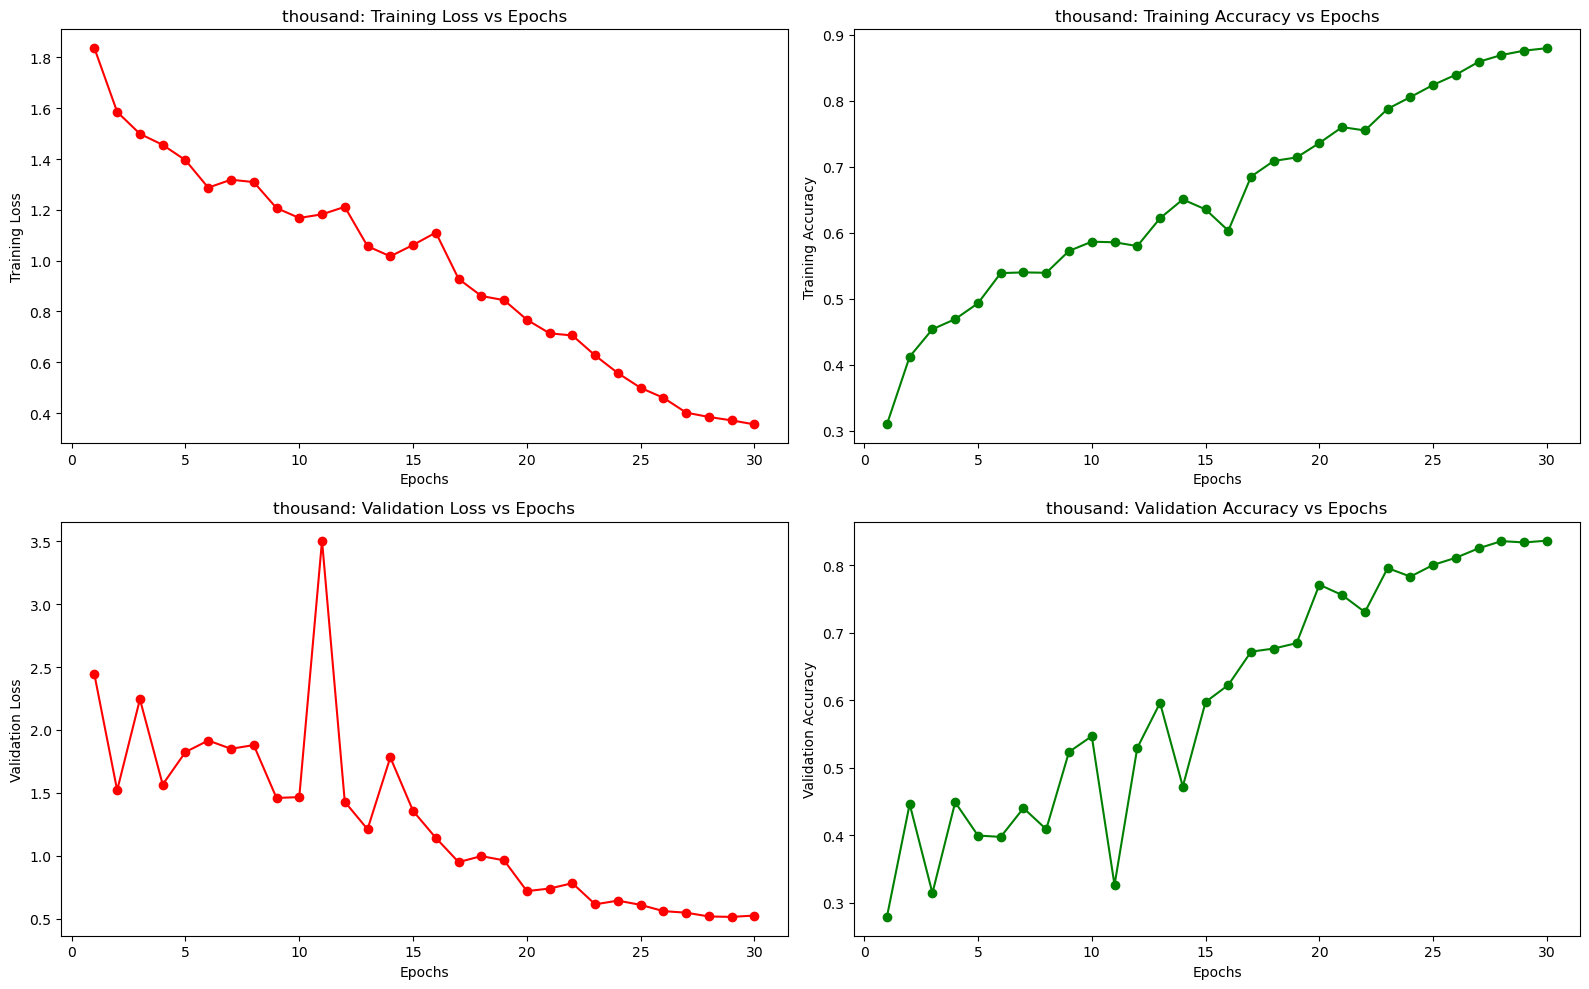

In [25]:
plot_model_training_stats(thous_experiment, thous_epoch_numbers, thous_training_losses, thous_validation_losses, thous_training_accuracy, thous_validation_accuracy)

# Plotting training-test accuracy vs num of instances

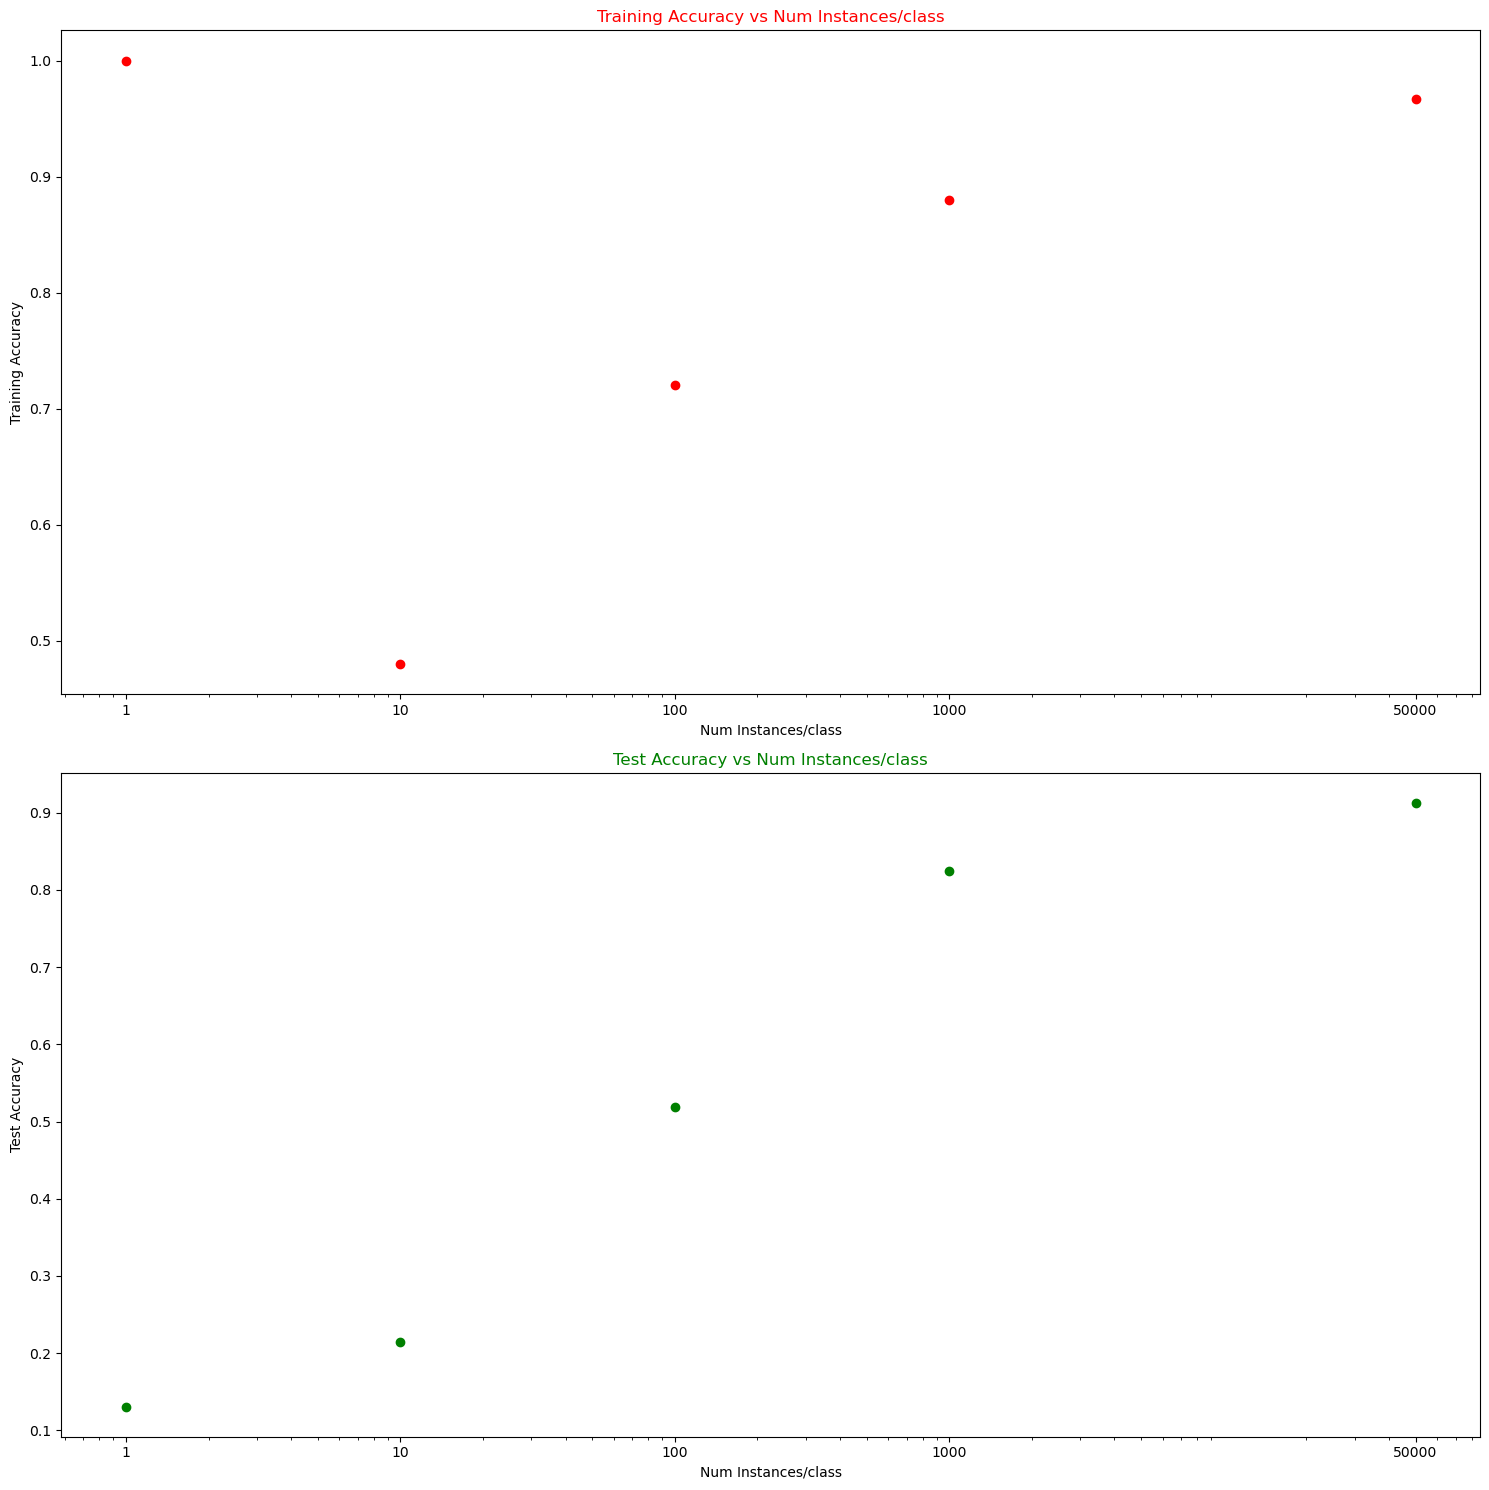

In [26]:
#Note these values are copied over from the logs of my previous run as I am plotting this point additionally as it wasnt present in my original graph
full_cifar_training_accuracy = 0.96682
full_cifar_testing_accuracy = 0.9125882

num_instance = [1, 10, 100, 1000,50000]
final_training_accuracies = [
    one_training_accuracy[-1],
    ten_training_accuracy[-1],
    hund_training_accuracy[-1],
    thous_training_accuracy[-1],
    full_cifar_training_accuracy
]
final_test_accuracies = [
    one_cifar_test_accuracy,
    ten_cifar_test_accuracy,
    hund_cifar_test_accuracy,
    thous_cifar_test_accuracy,
    full_cifar_testing_accuracy
]
# Create a subplot grid
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

axes[0].scatter(num_instance, final_training_accuracies, marker="o", color="red")
axes[0].set_title(f'Training Accuracy vs Num Instances/class', color='red')
axes[0].set_xscale('log')  # Set x-axis to logarithmic scale
axes[0].set_xticks(num_instance)  # Set the x-axis ticks to the specified points
axes[0].get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Format x-axis labels
axes[0].set_xlabel('Num Instances/class')
axes[0].set_ylabel('Training Accuracy')

axes[1].scatter(num_instance, final_test_accuracies, marker="o", color="green")
axes[1].set_title(f'Test Accuracy vs Num Instances/class', color='green')
axes[1].set_xscale('log')  # Set x-axis to logarithmic scale
axes[1].set_xticks(num_instance)  # Set the x-axis ticks to the specified points
axes[1].get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Format x-axis labels
axes[1].set_xlabel('Num Instances/class')
axes[1].set_ylabel('Test Accuracy')

plt.tight_layout()
plt.show()